<a href="https://colab.research.google.com/github/Darknessdark898/MLF/blob/main/MLFjankyProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Darknessdark898/MLF.git


Cloning into 'MLF'...
remote: Enumerating objects: 1779, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 1779 (delta 5), reused 1 (delta 1), pack-reused 1767 (from 2)
Receiving objects: 100% (1779/1779), 48.86 MiB | 13.04 MiB/s, done.
Resolving deltas: 100% (43/43), done.
Updating files: 100% (1631/1631), done.


# DATA LOAD AND CHECK

Training Data:
Images shape: (1491, 72, 48)
Labels shape: (1491,)

Test Data:
Images shape: (120, 72, 48)
IDs shape: (120,)


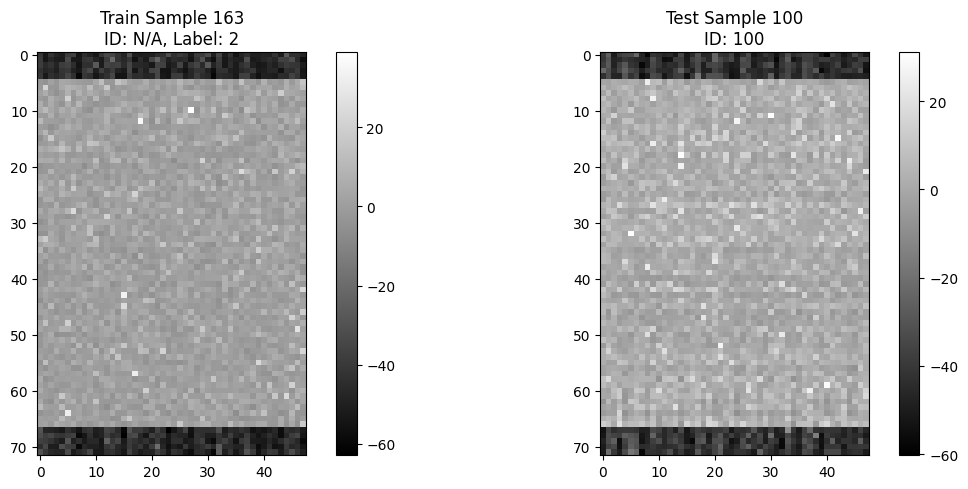


First 10 training labels:
Sample 0: Label = 0
Sample 1: Label = 0
Sample 2: Label = 0
Sample 3: Label = 0
Sample 4: Label = 0
Sample 5: Label = 0
Sample 6: Label = 0
Sample 7: Label = 0
Sample 8: Label = 0
Sample 9: Label = 0
Sample 10: Label = 2
Sample 11: Label = 0
Sample 12: Label = 0
Sample 13: Label = 0
Sample 14: Label = 0
Sample 15: Label = 0
Sample 16: Label = 0
Sample 17: Label = 0
Sample 18: Label = 1
Sample 19: Label = 0
Sample 20: Label = 0
Sample 21: Label = 1
Sample 22: Label = 0
Sample 23: Label = 0
Sample 24: Label = 1
Sample 25: Label = 0
Sample 26: Label = 0
Sample 27: Label = 0
Sample 28: Label = 0
Sample 29: Label = 0
Sample 30: Label = 1
Sample 31: Label = 0
Sample 32: Label = 0
Sample 33: Label = 0
Sample 34: Label = 0
Sample 35: Label = 0
Sample 36: Label = 0
Sample 37: Label = 0
Sample 38: Label = 1
Sample 39: Label = 0
Sample 40: Label = 1
Sample 41: Label = 0
Sample 42: Label = 0
Sample 43: Label = 0
Sample 44: Label = 0
Sample 45: Label = 0
Sample 46: Label 

In [3]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd

# load CSV with labels
labels_df = pd.read_csv('MLF/PROJECT/label_train.csv')

# set paths
train_folder_path = 'MLF/PROJECT/Train'
test_folder_path = 'MLF/PROJECT/Test'

#get sorted lists of .npy files
train_npy_files = sorted([f for f in os.listdir(train_folder_path) if f.endswith('.npy')],
                         key=lambda x: int(x.split('.')[0]))
test_npy_files = sorted([f for f in os.listdir(test_folder_path) if f.endswith('.npy')],
                        key=lambda x: int(x.split('.')[0]))

#initialization of lists
train_data = []  #tuples of (image, label)
test_data = []   #tuples of (image, ID)

#load training data with corresponding labels
for file in train_npy_files:
    image_id = int(file.split('.')[0])
    image = np.load(os.path.join(train_folder_path, file))
    label = labels_df.loc[labels_df['ID'] == image_id, 'target'].values[0]
    train_data.append((image, label))

#load test data with IDs
for file in test_npy_files:
    image_id = int(file.split('.')[0])
    image = np.load(os.path.join(test_folder_path, file))
    test_data.append((image, image_id))

#unzip into separate lists
train_images, train_labels = zip(*train_data)
test_images, test_ids = zip(*test_data)

#convert to numpy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_ids = np.array(test_ids)

#chceck of the shape of data
print("Training Data:")
print(f"Images shape: {train_images.shape}")  #should be (num_samples, 72, 48)
print(f"Labels shape: {train_labels.shape}")  #should be (num_samples,)

print("\nTest Data:")
print(f"Images shape: {test_images.shape}")   #should be (num_samples, 72, 48)
print(f"IDs shape: {test_ids.shape}")        #should be (num_samples,)

#visualize examples
def visualize_examples():
    plt.figure(figsize=(12, 5))

    #train example
    plt.subplot(1, 2, 1)
    idx = 163  #index
    plt.imshow(train_images[idx], cmap='gray')
    plt.title(f"Train Sample {idx}\nID: {test_ids[idx] if idx < len(test_ids) else 'N/A'}, Label: {train_labels[idx]}")
    plt.colorbar()

    #test example
    plt.subplot(1, 2, 2)
    idx = 100  #index
    plt.imshow(test_images[idx], cmap='gray')
    plt.title(f"Test Sample {idx}\nID: {test_ids[idx]}")
    plt.colorbar()

    plt.tight_layout()
    plt.show()

visualize_examples()

#some additional verification
print("\nFirst 10 training labels:")
for i, (img, label) in enumerate(zip(train_images[:100], train_labels[:100])):
    print(f"Sample {i}: Label = {label}")

# PREPARE DATA AND TRAIN MODEL

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

#split tuples into two lists
images, labels = zip(*train_data)

#convert to numpy arrays
X = np.array(images, dtype=np.float32)
y = np.array(labels)

#normalize pixel values to range [0, 1]
X = X / 255.0

#add channel dimension for grayscale images → (samples, 72, 48, 1) (ceknut ci je okej)
X = X[..., np.newaxis]

#onehot encode labels of 3 labels (0, 1, 2)
y = to_categorical(y, num_classes=3)

#split for train/validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization



model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(72, 48, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    #Dropout(0.5),
    Dense(3, activation='softmax')  #3 output classes
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=16,
                    validation_data=(X_val, y_val))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 70, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 35, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 33, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10240)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,310,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,330,051 (5.07 MB)

 Trainable params: 1,330,051 (5.07 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.7700 - loss: 0.6433 - val_accuracy: 0.8829 - val_loss: 0.3557
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - accuracy: 0.9027 - loss: 0.2703 - val_accuracy: 0.9164 - val_loss: 0.1993
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 92ms/step - accuracy: 0.9594 - loss: 0.1278 - val_accuracy: 0.9799 - val_loss: 0.0738
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - accuracy: 0.9855 - loss: 0.0582 - val_accuracy: 0.9197 - val_loss: 0.2327
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - accuracy: 0.9744 - loss: 0.0642 - val_accuracy: 0.9565 - val_loss: 0.0748
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - accuracy: 0.9924 - loss: 0.0407 - val_accuracy: 0.9766 - val_loss: 0.0747
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.9936 - loss: 0.0296 - val_accuracy: 0.9799 - val_loss: 0.0517
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - accuracy: 0.9955 - loss: 0.0196 - val_accuracy: 0.9632 - 

# TEST MODEL AND MAKE PREDICTION CSV



In [9]:
import pandas as pd
import numpy as np

#extract images
test_images = [img for img, _ in test_data]
test_ids = [id for _, id in test_data]

#convert to numpy array and normalize
X_test = np.array(test_images, dtype=np.float32) / 255.0

#reshape to (samples, 72, 48, 1)
X_test = X_test[..., np.newaxis]

#predict class probabilities
pred_probs = model.predict(X_test)

#get the class with the highest probability
predicted_classes = np.argmax(pred_probs, axis=1)

#include IDs for tracking
df = pd.DataFrame({
    'ID': test_ids,
    'Predicted': predicted_classes
})

#save to CSV
df.to_csv('cnn_predictions.csv', index=False)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step



Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 70, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 35, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 33, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10240)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,310,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,990,155 (15.22 MB)

 Trainable params: 1,330,051 (5.07 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,660,104 (10.15 MB)

Model architecture plot saved as 'model_architecture.png'

Training History:


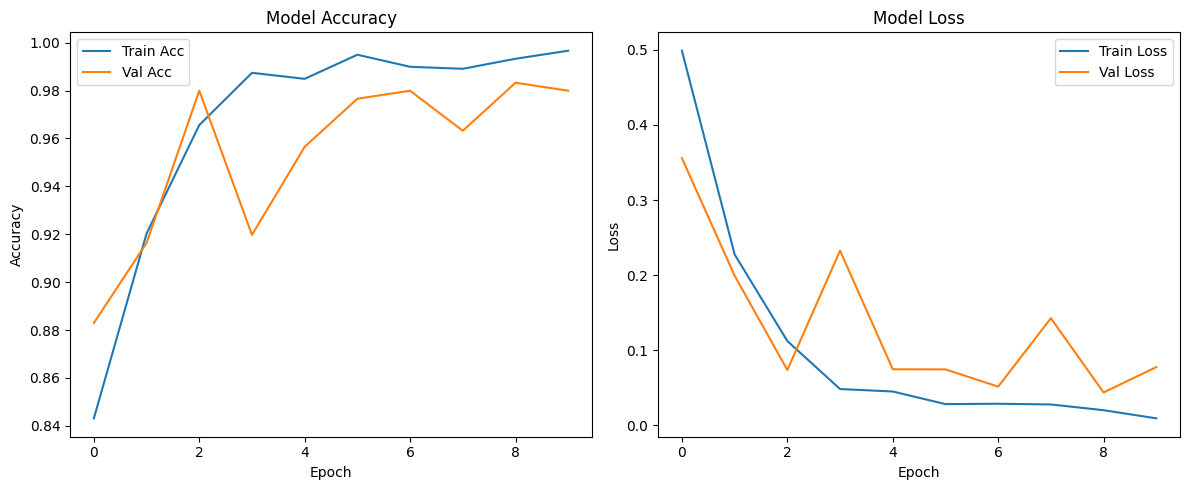


Validation Accuracy: 0.9821
Validation Loss: 0.0747
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


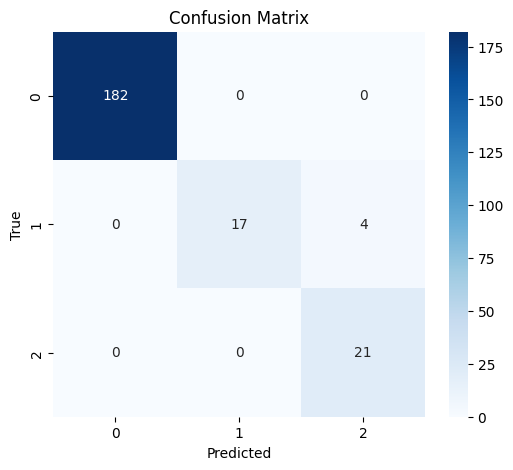


Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       182
           1     1.0000    0.8095    0.8947        21
           2     0.8400    1.0000    0.9130        21

    accuracy                         0.9821       224
   macro avg     0.9467    0.9365    0.9359       224
weighted avg     0.9850    0.9821    0.9820       224



In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.utils import plot_model

#summary of the model
print("\nModel Summary:")
model.summary()

#model architecture diagram
try:
    plot_model(model, to_file="model_architecture.png", show_shapes=True)
    print("Model architecture plot saved as 'model_architecture.png'")
except:
    print("Could not plot model. Ensure `pydot` and `graphviz` are installed.")

#training history plot
print("\nTraining History:")

plt.figure(figsize=(12, 5))

#accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

#loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

#evaulate on validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
print(f"\nValidation Accuracy: {val_accuracy:.4f}")
print(f"Validation Loss: {val_loss:.4f}")

#confusion matrix plot
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

#classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, digits=4))


### **HYPERPARAMETER TUNING**

In [7]:
!pip install -q keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.9 MB/s eta 0:00:00


In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import tensorflow as tf

images, labels = zip(*train_data)

X = np.array(images, dtype=np.float32) / 255.0
X = X[..., np.newaxis]

y = to_categorical(np.array(labels), num_classes=3)

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.15, random_state=42, stratify=y
)


def model_builder(hp):
    model = Sequential()

    model.add(Conv2D(
        filters=hp.Int('conv1_filters', min_value=32, max_value=128, step=32),
        kernel_size=hp.Choice('conv1_kernel', values=[3, 5]),
        activation='relu',
        input_shape=(72, 48, 1)
    ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(
        filters=hp.Int('conv2_filters', min_value=32, max_value=128, step=32),
        kernel_size=hp.Choice('conv2_kernel', values=[3, 5]),
        activation='relu'
    ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())

    model.add(Dense(
        units=hp.Int('dense_units', min_value=64, max_value=256, step=64),
        activation='relu'
    ))

    model.add(Dropout(hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)))

    model.add(Dense(3, activation='softmax'))

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

#set up keras tuner
tuner = kt.RandomSearch(
    model_builder,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='tuner_dir',
    project_name='hyperparam_cnn'
)

#tuner seacrh run
tuner.search(X_train, y_train,
             validation_data=(X_val, y_val),
             epochs=10,
             batch_size=16,
             verbose=1)

#get best model and retrain it
best_model = tuner.get_best_models(1)[0]
best_hps = tuner.get_best_hyperparameters(1)[0]

print("\n📊 Best hyperparameters found:")
for hp_name in best_hps.values.keys():
    print(f"{hp_name}: {best_hps.get(hp_name)}")

#train best model more
history = best_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=16
)


Trial 3 Complete [00h 03m 21s]
val_accuracy: 0.9910714030265808

Best val_accuracy So Far: 0.9910714030265808
Total elapsed time: 00h 06m 43s

Search: Running Trial #4

Value             |Best Value So Far |Hyperparameter
32                |32                |conv1_filters
5                 |3                 |conv1_kernel
32                |96                |conv2_filters
5                 |3                 |conv2_kernel
128               |256               |dense_units
0.2               |0.4               |dropout_rate

Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 9s 83ms/step - accuracy: 0.7787 - loss: 0.6466 - val_accuracy: 0.8795 - val_loss: 0.3448
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - accuracy: 0.9046 - loss: 0.2651 - val_accuracy: 0.9777 - val_loss: 0.0828
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 10s 68ms/step - accuracy: 0.9797 - loss: 0.0694 - val_accuracy: 0.9018 - val_loss: 0.1924
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - accuracy: 0.9614 - loss: 0.0977 - v

KeyboardInterrupt: 